In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
%matplotlib inline

In [2]:
data_path = "../../data/data.duckdb"
conn = duckdb.connect(data_path)

In [3]:
def query(param: str) -> None:
    result = conn.execute(param).df()
    print(result)

In [4]:
df = conn.execute("SELECT * FROM span_data").fetchdf()

In [5]:
df.head()

,Name,Age,Gender,Zone_of_Residence,Reason_of_low_attention_span,Screentime_mins,Attention_span_mins
0,Abrar,17,M,Motijheel,Lack of Sleep & Poor Health,180.0,4.0
1,Kanchon,16,M,Mohammadpur,Lack of Sleep & Poor Health,180.0,22.5
2,Shafi,17,M,Tejgaon,Lack of Sleep & Poor Health,180.0,45.0
3,Zunyaed,18,M,Farmgate,Stress & Anxiety,75.0,1.5
4,Jabeer,17,M,Shahbagh,Family Problems,180.0,45.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          897 non-null    object 
 1   Age                           897 non-null    int64  
 2   Gender                        897 non-null    object 
 3   Zone_of_Residence             897 non-null    object 
 4   Reason_of_low_attention_span  897 non-null    object 
 5   Screentime_mins               858 non-null    float64
 6   Attention_span_mins           897 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 49.2+ KB


In [7]:
df.describe()

,Age,Screentime_mins,Attention_span_mins
count,897.000000,858.000000,897.000000
mean,24.124861,194.388112,20.940357
std,9.557043,128.447119,17.417361
min,10.000000,75.000000,1.500000
25%,19.000000,75.000000,1.500000
50%,23.000000,180.000000,22.500000
75%,28.000000,300.000000,45.000000
max,222.000000,540.000000,45.000000


In [8]:
print("Mean Screentime:", df['Screentime_mins'].mean())
print("Median Screentime:", df['Screentime_mins'].median())
print("Std Screentime:", df['Screentime_mins'].std())

print("Mean Attention Span:", df['Attention_span_mins'].mean())
print("Median Attention Span:", df['Attention_span_mins'].median())
print("Std Attention Span:", df['Attention_span_mins'].std())

Mean Screentime: 194.3881118881119
Median Screentime: 180.0
Std Screentime: 128.44711945238038
Mean Attention Span: 20.94035674470457
Median Attention Span: 22.5
Std Attention Span: 17.417360973047792


In [9]:
reason_counts = df['Reason_of_low_attention_span'].value_counts()
print("Counts per reason:\n", reason_counts)

# Count by Zone_of_Residence
zone_counts = df['Zone_of_Residence'].value_counts()
print("\nCounts per zone:\n", zone_counts)

Counts per reason:
 Reason_of_low_attention_span
Smartphones & Social Media     217
Stress & Anxiety               148
Lack of Sleep & Poor Health    143
Multitasking                   116
Relationship                    98
Lack of Goal Clarity            88
Family Problems                 87
Name: count, dtype: int64

Counts per zone:
 Zone_of_Residence
Motijheel       111
Farmgate        108
Shahbagh         99
Tejgaon          98
Mohammadpur      89
Ramna            36
Bailey Road      36
Bashabo          34
Gulistan         33
Dhanmondi        33
Malibagh         33
Jigatola         32
Jatrabari        32
Wari             31
Khilgaon         31
Siddheshwari     31
Secretariat      29
DHanmondi         1
Name: count, dtype: int64


In [15]:
# Fix typo in Zone_of_Residence
df['Zone_of_Residence'] = df['Zone_of_Residence'].replace({'DHanmondi': 'Dhanmondi'})

In [12]:
corr = df[['Screentime_mins', 'Attention_span_mins']].corr()
print("\nCorrelation matrix:\n", corr)

# Optional: compute correlation manually
screentime = df['Screentime_mins'].values
attention = df['Attention_span_mins'].values
corr_manual = np.corrcoef(screentime, attention)[0, 1]
print("Manual correlation between Screentime and Attention Span:", corr_manual)


Correlation matrix:
                      Screentime_mins  Attention_span_mins
Screentime_mins             1.000000            -0.011181
Attention_span_mins        -0.011181             1.000000
Manual correlation between Screentime and Attention Span: nan


In [16]:
zone_reason_counts = pd.crosstab(
    df['Zone_of_Residence'],
    df['Reason_of_low_attention_span']
)

zone_reason_counts

Reason_of_low_attention_span,Family Problems,Lack of Goal Clarity,Lack of Sleep & Poor Health,Multitasking,Relationship,Smartphones & Social Media,Stress & Anxiety
Zone_of_Residence,,,,,,,
Bailey Road,5,0,7,3,6,10,5
Bashabo,2,3,7,8,4,7,3
Dhanmondi,4,1,5,2,4,9,9
Farmgate,12,11,18,17,11,19,20
Gulistan,5,7,2,1,3,11,4
Jatrabari,1,4,4,4,3,8,8
Jigatola,3,2,8,6,2,10,1
Khilgaon,3,3,7,2,1,8,7
Malibagh,3,3,6,5,1,10,5


In [18]:
zone_reason_percent = pd.crosstab(
    df['Zone_of_Residence'],
    df['Reason_of_low_attention_span'],
    normalize='index'
) * 100
zone_reason_percent

Reason_of_low_attention_span,Family Problems,Lack of Goal Clarity,Lack of Sleep & Poor Health,Multitasking,Relationship,Smartphones & Social Media,Stress & Anxiety
Zone_of_Residence,,,,,,,
Bailey Road,13.888889,0.000000,19.444444,8.333333,16.666667,27.777778,13.888889
Bashabo,5.882353,8.823529,20.588235,23.529412,11.764706,20.588235,8.823529
Dhanmondi,11.764706,2.941176,14.705882,5.882353,11.764706,26.470588,26.470588
Farmgate,11.111111,10.185185,16.666667,15.740741,10.185185,17.592593,18.518519
Gulistan,15.151515,21.212121,6.060606,3.030303,9.090909,33.333333,12.121212
Jatrabari,3.125000,12.500000,12.500000,12.500000,9.375000,25.000000,25.000000
Jigatola,9.375000,6.250000,25.000000,18.750000,6.250000,31.250000,3.125000
Khilgaon,9.677419,9.677419,22.580645,6.451613,3.225806,25.806452,22.580645
Malibagh,9.090909,9.090909,18.181818,15.151515,3.030303,30.303030,15.151515


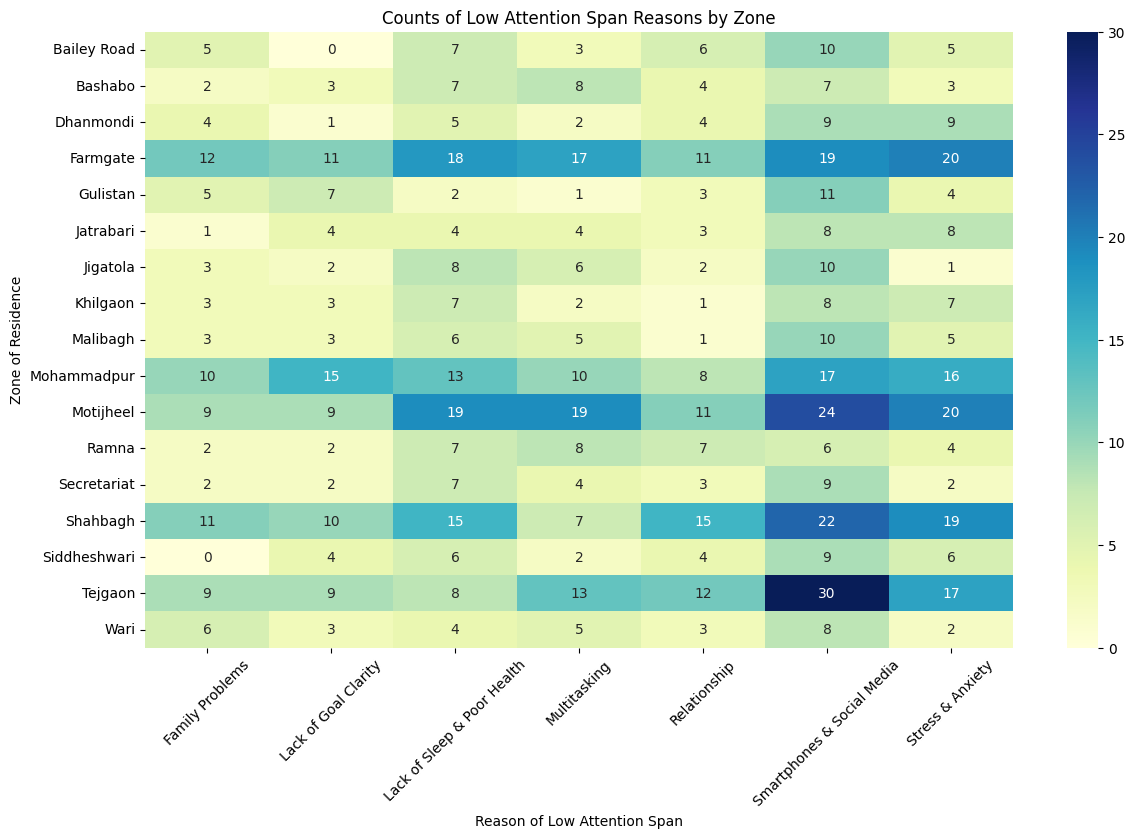

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.heatmap(zone_reason_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Counts of Low Attention Span Reasons by Zone")
plt.ylabel("Zone of Residence")
plt.xlabel("Reason of Low Attention Span")
plt.xticks(rotation=45)
plt.show()


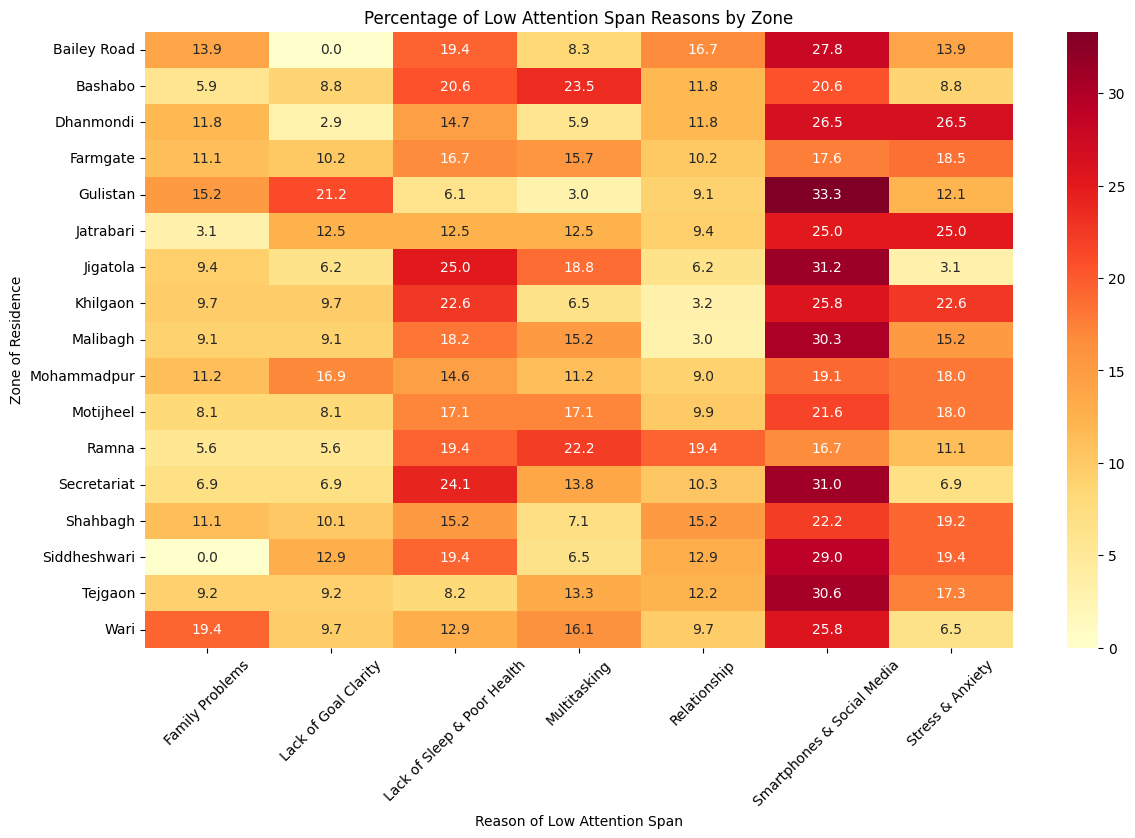

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(zone_reason_percent, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title("Percentage of Low Attention Span Reasons by Zone")
plt.ylabel("Zone of Residence")
plt.xlabel("Reason of Low Attention Span")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Count per gender
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
M    502
F    394
R      1
Name: count, dtype: int64

In [23]:
# Average Screentime and Attention span by gender
gender_stats = df.groupby('Gender')[['Screentime_mins','Attention_span_mins']].agg(['mean','median','std'])
gender_stats

Screentime_mins                    Attention_span_mins         \
                  mean median         std                mean median   
Gender                                                                 
F           190.212766  180.0  126.317937           20.793147   22.5   
M           197.900208  180.0  130.136380           21.089641   22.5   
R            75.000000   75.0         NaN            4.000000    4.0   

                   
              std  
Gender             
F       17.145975  
M       17.644299  
R             NaN

In [24]:
# Find rows where Gender is 'R'
r_record = df[df['Gender'] == 'R']

# Display the Name
print(r_record['Name'])


597    Ankita
Name: Name, dtype: object


In [25]:
# Replace 'R' with 'F' in Gender column
df['Gender'] = df['Gender'].replace('R', 'F')

# Verify the change
print(df['Gender'].value_counts())


Gender
M    502
F    395
Name: count, dtype: int64


In [26]:
# Screentime and Attention span by age
age_stats = df.groupby('Age')[['Screentime_mins','Attention_span_mins']].agg(['mean','median','std'])
age_stats

Screentime_mins                    Attention_span_mins                  
               mean median         std                mean median        std
Age                                                                         
10       180.000000  180.0    0.000000           23.250000  23.25  30.759145
12       198.750000  180.0   94.443861           26.750000  22.50  16.782218
13       240.000000  180.0  166.763305           20.384615  22.50  18.991395
14       195.000000  180.0  108.166538           23.000000  22.50  18.552138
15       171.000000  180.0  121.172840           19.842105  22.50  17.838047
16       173.846154  180.0  117.038351           21.743590  22.50  16.869028
17       181.904762  180.0  120.347040           21.115385  22.50  18.089571
18       196.090909  180.0  121.718752           15.781818  10.00  16.821988
19       181.415094  180.0  125.714792           18.794643  10.00  17.135762
20       215.384615  180.0  128.827632           22.358974  22.50  16.295765
21       185.357143  180.0  116.133821           20.659574  22.50  16.506621
22       207.155172  180.0  131.112353           22.539062  22.50  17.374791
23       216.300000  180.0  139.733018           22.644231  22.50  17.061118
24       198.250000  180.0  116.520257           18.341667  22.50  15.937242
25       191.326531  180.0  134.879481           23.382353  22.50  18.349547
26       189.000000  180.0  120.038455           20.975000  22.50  18.145053
27       187.021277  180.0  142.297375           17.297872  22.50  17.100299
28       167.368421  180.0  121.336793           19.236842  16.25  17.488891
29       194.000000  180.0  135.139774           28.937500  45.00  19.520771
30       248.750000  180.0  153.667130           26.923077  22.50  18.326316
31       230.869565  180.0  138.864324           23.875000  22.50  18.429212
32       165.000000   75.0  145.761547           24.250000  22.50  18.996323
33       218.653846  180.0  151.265050           16.942308  16.25  16.589350
34       225.000000  180.0  164.487841           15.388889  10.00  18.144865
35       157.500000  127.5  107.121426           24.800000  22.50  19.895351
36       157.500000  127.5  107.121426           28.125000  22.50  11.250000
37       150.000000  180.0   51.234754           18.812500  22.50  13.820113
38       225.000000  180.0  176.847392           16.833333   4.00  24.425055
39       265.000000  180.0  243.874968            2.333333   1.50   1.443376
40       180.000000  180.0    0.000000           12.000000  12.00  14.849242
42       265.000000  180.0  243.874968           30.500000  45.00  25.114737
43       167.500000  127.5  110.397011           28.583333  33.75  18.948395
44       172.500000  127.5  128.535709           16.062500   5.75  19.276999
46       145.000000  180.0   60.621778           18.333333  22.50   7.216878
47       110.000000   75.0   60.621778           18.333333  22.50   7.216878
48        75.000000   75.0    0.000000           23.000000  22.50  21.754310
51        75.000000   75.0         NaN           22.500000  22.50        NaN
55        75.000000   75.0         NaN           13.250000  13.25  13.081475
222      180.000000  180.0         NaN           22.500000  22.50        NaN

In [28]:
bins = [0, 15, 18, 25, 50, 100, 222]
labels = ['0-15','16-18','19-25','26-50','51-100','100+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

agegroup_stats = df.groupby('Age_group')[['Screentime_mins','Attention_span_mins']].mean()
agegroup_stats

C:\Users\Mycin\AppData\Local\Temp\ipykernel_14256\594991576.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_stats = df.groupby('Age_group')[['Screentime_mins','Attention_span_mins']].mean()


,Screentime_mins,Attention_span_mins
Age_group,,
0-15,197.872340,21.824074
16-18,184.872611,19.424528
19-25,199.145299,21.161247
26-50,194.100000,21.339228
51-100,75.000000,16.333333
100+,180.000000,22.500000


In [29]:
# Count participants per zone
zone_counts = df['Zone_of_Residence'].value_counts()
zone_counts


Zone_of_Residence
Motijheel       111
Farmgate        108
Shahbagh         99
Tejgaon          98
Mohammadpur      89
Ramna            36
Bailey Road      36
Bashabo          34
Dhanmondi        34
Malibagh         33
Gulistan         33
Jigatola         32
Jatrabari        32
Khilgaon         31
Siddheshwari     31
Wari             31
Secretariat      29
Name: count, dtype: int64

In [30]:
# Average Screentime and Attention by zone
zone_stats = df.groupby('Zone_of_Residence')[['Screentime_mins','Attention_span_mins']].mean()
zone_stats


,Screentime_mins,Attention_span_mins
Zone_of_Residence,,
Bailey Road,239.142857,23.958333
Bashabo,203.437500,20.088235
Dhanmondi,170.322581,19.985294
Farmgate,187.135922,20.657407
Gulistan,235.312500,16.621212
Jatrabari,183.500000,16.234375
Jigatola,166.451613,22.937500
Khilgaon,192.580645,20.032258
Malibagh,193.636364,20.045455


In [31]:
# Count per reason
reason_counts = df['Reason_of_low_attention_span'].value_counts()
reason_counts


Reason_of_low_attention_span
Smartphones & Social Media     217
Stress & Anxiety               148
Lack of Sleep & Poor Health    143
Multitasking                   116
Relationship                    98
Lack of Goal Clarity            88
Family Problems                 87
Name: count, dtype: int64

In [32]:
# Average Screentime and Attention by reason
reason_stats = df.groupby('Reason_of_low_attention_span')[['Screentime_mins','Attention_span_mins']].mean()
reason_stats

,Screentime_mins,Attention_span_mins
Reason_of_low_attention_span,,
Family Problems,198.035714,16.867816
Lack of Goal Clarity,212.678571,21.647727
Lack of Sleep & Poor Health,193.905109,21.143357
Multitasking,191.739130,17.543103
Relationship,186.521739,23.030612
Smartphones & Social Media,198.677885,22.267281
Stress & Anxiety,182.500000,22.050676


In [33]:
zone_reason = pd.crosstab(df['Zone_of_Residence'], df['Reason_of_low_attention_span'])
zone_reason

Reason_of_low_attention_span,Family Problems,Lack of Goal Clarity,Lack of Sleep & Poor Health,Multitasking,Relationship,Smartphones & Social Media,Stress & Anxiety
Zone_of_Residence,,,,,,,
Bailey Road,5,0,7,3,6,10,5
Bashabo,2,3,7,8,4,7,3
Dhanmondi,4,1,5,2,4,9,9
Farmgate,12,11,18,17,11,19,20
Gulistan,5,7,2,1,3,11,4
Jatrabari,1,4,4,4,3,8,8
Jigatola,3,2,8,6,2,10,1
Khilgaon,3,3,7,2,1,8,7
Malibagh,3,3,6,5,1,10,5


In [34]:
gender_reason = pd.crosstab(df['Gender'], df['Reason_of_low_attention_span'])
gender_reason

Reason_of_low_attention_span,Family Problems,Lack of Goal Clarity,Lack of Sleep & Poor Health,Multitasking,Relationship,Smartphones & Social Media,Stress & Anxiety
Gender,,,,,,,
F,40,38,55,55,46,90,71
M,47,50,88,61,52,127,77


In [35]:
age_reason = pd.crosstab(df['Age_group'], df['Reason_of_low_attention_span'])
age_reason

Reason_of_low_attention_span,Family Problems,Lack of Goal Clarity,Lack of Sleep & Poor Health,Multitasking,Relationship,Smartphones & Social Media,Stress & Anxiety
Age_group,,,,,,,
0-15,9,3,11,6,1,19,5
16-18,19,11,29,27,15,30,28
19-25,29,35,46,50,49,93,67
26-50,30,39,55,33,33,74,47
51-100,0,0,1,0,0,1,1
100+,0,0,1,0,0,0,0


In [36]:
# Drop NaNs in Screentime
df_corr = df[['Age','Screentime_mins','Attention_span_mins']].dropna()

# Pearson correlation
corr_matrix = df_corr.corr()
print(corr_matrix)

# Optional: manual correlation between Screentime and Attention Span
screentime = df_corr['Screentime_mins'].values
attention = df_corr['Attention_span_mins'].values
manual_corr = np.corrcoef(screentime, attention)[0,1]
print("Manual correlation between Screentime and Attention Span:", manual_corr)


                          Age  Screentime_mins  Attention_span_mins
Age                  1.000000        -0.009777             0.003743
Screentime_mins     -0.009777         1.000000            -0.011181
Attention_span_mins  0.003743        -0.011181             1.000000
Manual correlation between Screentime and Attention Span: -0.011180852463309755


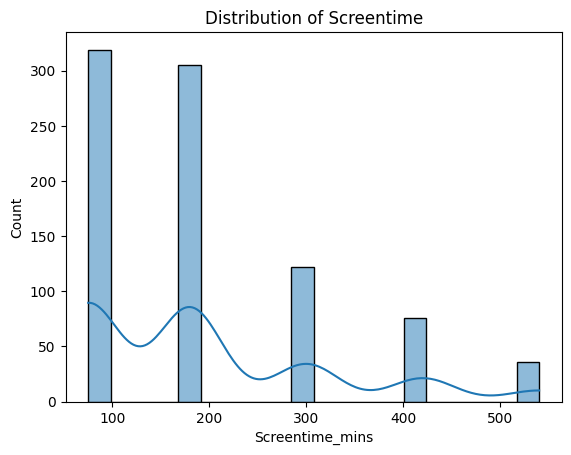

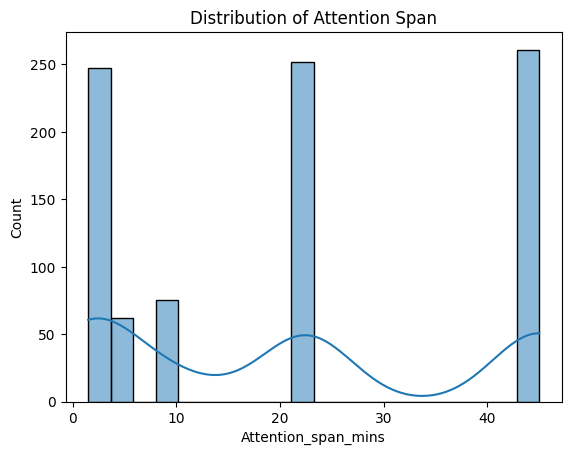

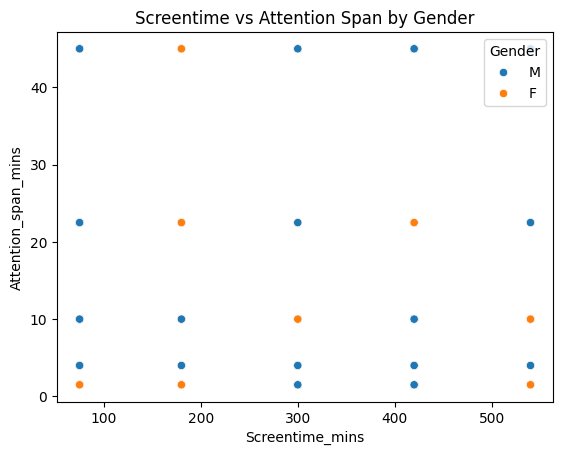

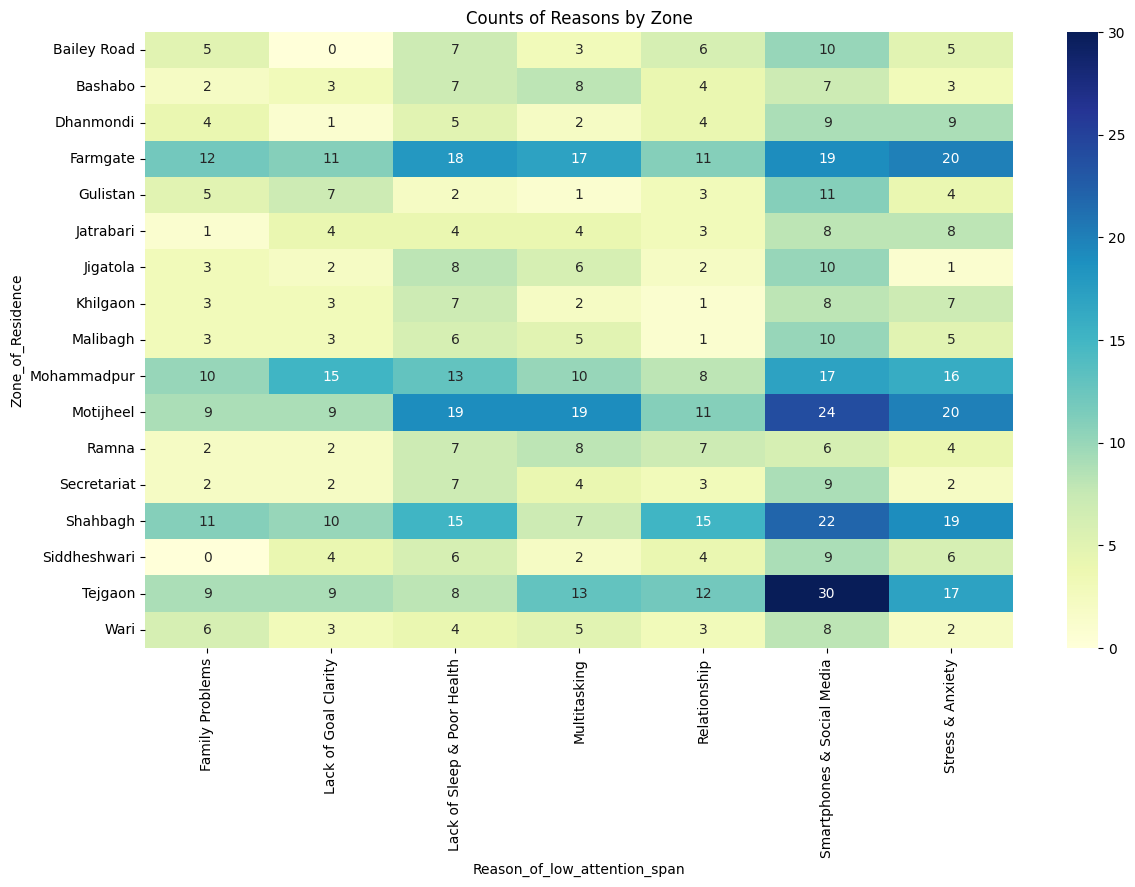

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Screentime
sns.histplot(df['Screentime_mins'].dropna(), bins=20, kde=True)
plt.title("Distribution of Screentime")
plt.show()

# Histogram of Attention Span
sns.histplot(df['Attention_span_mins'], bins=20, kde=True)
plt.title("Distribution of Attention Span")
plt.show()

# Scatter Screentime vs Attention Span
sns.scatterplot(x='Screentime_mins', y='Attention_span_mins', hue='Gender', data=df)
plt.title("Screentime vs Attention Span by Gender")
plt.show()

# Heatmap of Zone × Reason
zone_reason_counts = pd.crosstab(df['Zone_of_Residence'], df['Reason_of_low_attention_span'])
plt.figure(figsize=(14,8))
sns.heatmap(zone_reason_counts, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Counts of Reasons by Zone")
plt.show()
